## Model Functionality Test
This notebook concentrates on testing the functionality of the model. The model is implemented in the `model/simple_model.py` file.

### Packages and Modules

In [1]:
cd ..

/home/tsunn/Workspace/free/Neural-Network-Approximation


In [2]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from data.generators import *
from model.simple_model import ReLU_Network
from utils.trainer import train_model
from utils.evaluator import evaluate_model
from utils.visualizer import *

/home/tsunn/anaconda3/envs/nna/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1D Convex Approximation

In [3]:
X_train, X_val, y_train, y_val = generate_1d_convex(n_samples=1000)

In [4]:
train_dataset = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).float())
val_dataset = TensorDataset(torch.tensor(X_val).float(), torch.tensor(y_val).float())

In [5]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

### Model Testing

In [6]:
model = ReLU_Network(input_dim=1, hidden_layers=4, hidden_units=20, output_dim=1)
model

ReLU_Network(
  (network): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=20, bias=True)
    (7): ReLU()
    (8): Linear(in_features=20, out_features=1, bias=True)
  )
)

Training Neural Network

In [7]:
logs = train_model(model, train_loader, val_loader, epochs=16, lr=0.01, device='cpu')

Training Configurations:
Device: cpu
Epochs: 16
Learning Rate: 0.01



Training: 100%|██████████| 16/16 [00:00<00:00, 38.38epoch/s]


Evaluating the model

In [8]:
y_pred, y_actual = evaluate_model(model, val_loader)

Evaluation Configurations:
Device: cpu



Evaluating: 100%|██████████| 13/13 [00:00<00:00, 5466.81batch/s]


Visualizing the results

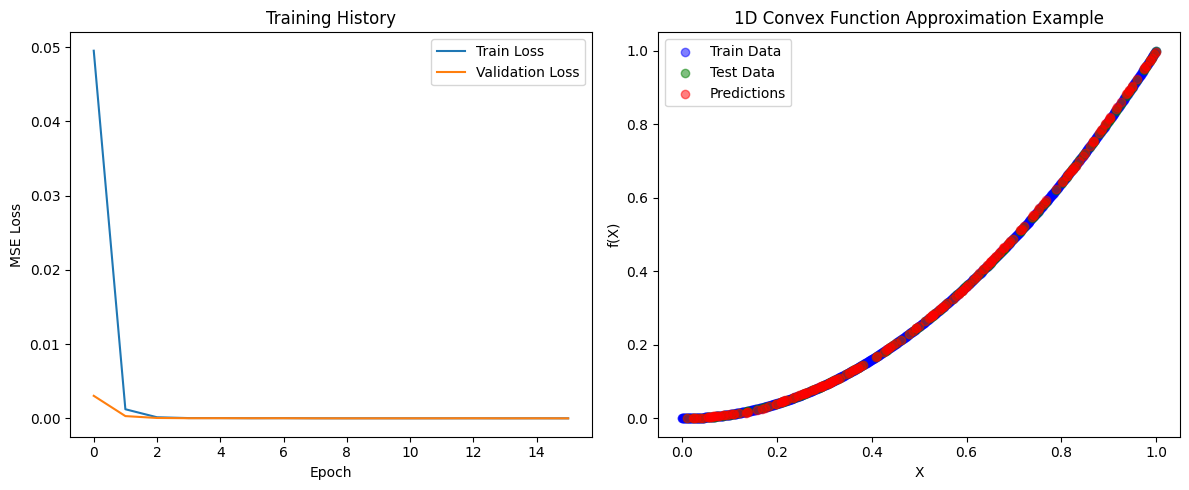

In [9]:
plot_results_1d(
    X_train, y_train, 
    X_val, y_val, 
    y_pred, 
    logs, 
    title='1D Convex Function Approximation Example'
)

## 1D Non-Convex Approximation

In [10]:
X_train, X_val, y_train, y_val = generate_1d_non_convex(n_samples=1000)

In [11]:
train_dataset = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).float())
val_dataset = TensorDataset(torch.tensor(X_val).float(), torch.tensor(y_val).float())

In [12]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

### Model Testing

In [13]:
model = ReLU_Network(input_dim=1, hidden_layers=4, hidden_units=20, output_dim=1)
model

ReLU_Network(
  (network): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=20, bias=True)
    (7): ReLU()
    (8): Linear(in_features=20, out_features=1, bias=True)
  )
)

Now we perform the same steps as before but with a non-convex dataset.

In [14]:
logs = train_model(model, train_loader, val_loader, epochs=16, lr=0.01, device='cpu')

Training Configurations:
Device: cpu
Epochs: 16
Learning Rate: 0.01



Training: 100%|██████████| 16/16 [00:00<00:00, 36.76epoch/s]


In [15]:
y_pred, y_actual = evaluate_model(model, val_loader)

Evaluation Configurations:
Device: cpu



Evaluating: 100%|██████████| 13/13 [00:00<00:00, 4950.60batch/s]


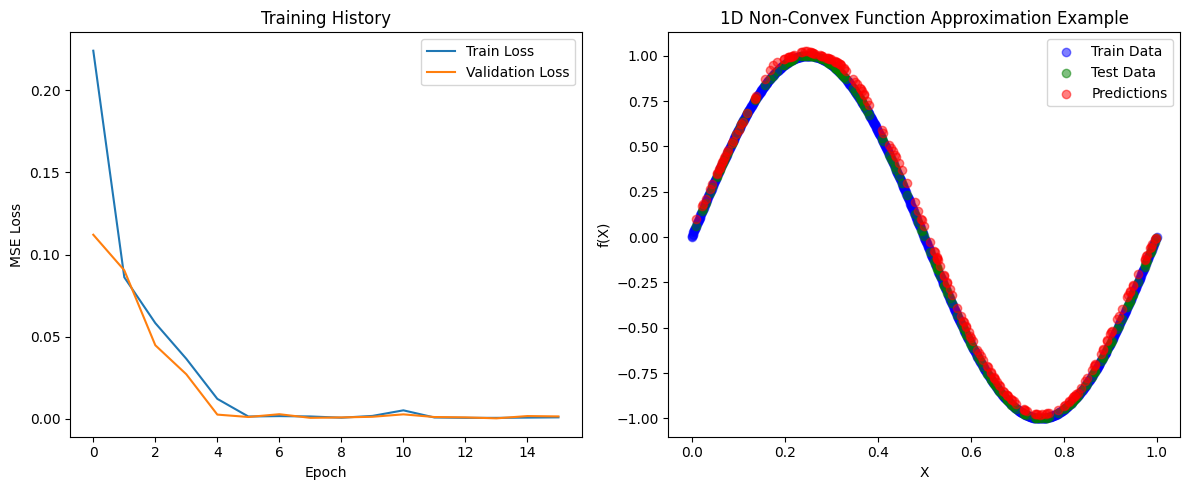

In [16]:
plot_results_1d(
    X_train, y_train, 
    X_val, y_val, 
    y_pred, 
    logs, 
    title='1D Non-Convex Function Approximation Example'
)

## 2D Convex Approximation

In [17]:
X_train, X_val, y_train, y_val = generate_2d_convex(n_samples=10000)

In [18]:
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                              torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32),
                            torch.tensor(y_val, dtype=torch.float32).unsqueeze(-1))

In [19]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

### Model Testing

In [20]:
model = ReLU_Network(input_dim=2, hidden_layers=3, hidden_units=64, output_dim=1)
model

ReLU_Network(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

The procedure is the same as before but with a 2D dataset.

In [21]:
logs = train_model(model, train_loader, val_loader, epochs=32, lr=0.01, device='cpu') # we increase the number of epochs, as the model is more complex

Training Configurations:
Device: cpu
Epochs: 32
Learning Rate: 0.01



Training: 100%|██████████| 32/32 [00:22<00:00,  1.42epoch/s]


In [22]:
y_pred, y_actual = evaluate_model(model, val_loader)

Evaluation Configurations:
Device: cpu



Evaluating: 100%|██████████| 125/125 [00:00<00:00, 8942.62batch/s]


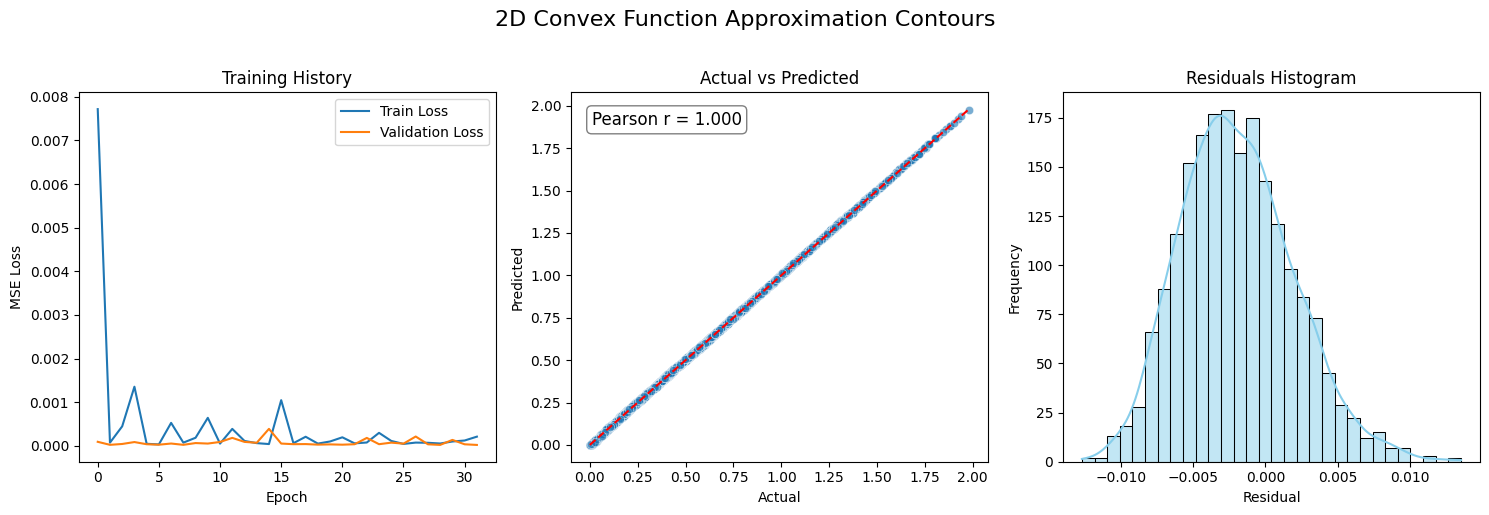

In [24]:
y_val_flat = y_val.flatten()
y_pred_flat = y_pred.flatten()

plot_results_2d(X_val, y_val_flat, y_pred_flat, 
                history=logs,
                title='2D Convex Function Approximation Contours',
                )

## 2D Non-Convex Approximation

In [25]:
X_train, X_val, y_train, y_val = generate_2d_non_convex(n_samples=10000)

In [26]:
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                              torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32),
                            torch.tensor(y_val, dtype=torch.float32).unsqueeze(-1))

In [27]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

### Model Testing

In [28]:
model = ReLU_Network(input_dim=2, hidden_layers=3, hidden_units=64, output_dim=1)
model

ReLU_Network(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [32]:
logs = train_model(model, train_loader, val_loader, epochs=64, lr=0.01, device='cpu') # we increase the number of epochs, as the model is on a more complex dataset

Training Configurations:
Device: cpu
Epochs: 64
Learning Rate: 0.01



Training: 100%|██████████| 64/64 [00:23<00:00,  2.67epoch/s]


In [33]:
y_pred, y_actual = evaluate_model(model, val_loader)

Evaluation Configurations:
Device: cpu



Evaluating: 100%|██████████| 125/125 [00:00<00:00, 9346.93batch/s]


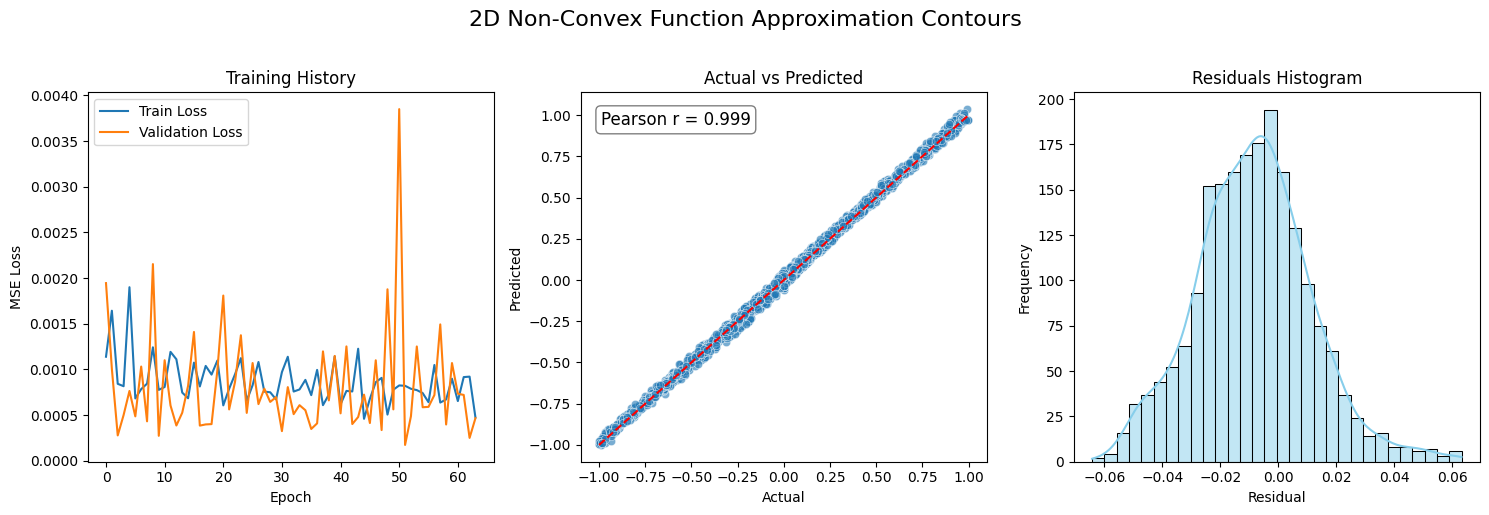

In [34]:
plot_results_2d(X_val, y_val.flatten(), y_pred.flatten(),
                history=logs,
                title='2D Non-Convex Function Approximation Contours')